Removed `ZTF19acardcs` - supernova on top of AGN - ~1000 day duration. Very rare case that is near-impossible to use here, as it is a combination of factors from two different sources.

### Methods used to clean data (all features from BTS Explorer)

**Variables**
* Uncontaminated reference - removes a lot of "bad data", fuzzy borders because of greater thans, etc. Bad reference could lead to bogus detection, so removes completely incorrect classification

**Transients**
* pre/post peak - removes incomplete/unclear light curves
* uncontaminated reference - same as above
* others - ultimately beneficial while removing little data (lots of overlap w/ pre/post peak)
* purity cut - small amount of data removed for large benefit

# Setup

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.neighbors import KNeighborsClassifier

In [5]:
t = pd.read_csv('cleaned-data/ctransients.csv')
v = pd.read_csv('cleaned-data/cvariables.csv')

In [6]:
#print number of transients and variables
print(f'Number of transients: {len(t)}')
print(f'Number of variables: {len(v)}')

Number of transients: 3946
Number of variables: 956


In [7]:
def hist(col, bw, xlim, title, xlabel):
    binwidth = bw
    binmin = min(min(t[col]), min(v[col]))
    binmax = max(max(t[col]), max(v[col]))
    bins = np.arange(binmin, binmax + binwidth, binwidth)
    #bins = np.linspace(binmin, binmax + 1, )
    plt.hist(t[col], zorder=1, edgecolor='r', alpha=0.5, color='r', bins=bins, histtype='step', density=False, label='Transient', linewidth=3)
    plt.hist(v[col], zorder=0, edgecolor='b', alpha=0.5, color='b', bins=bins, histtype='step', density=False, label='Variable', linewidth=3)
    plt.legend()
    plt.xlim(xlim)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Fractional Density')
    plt.savefig(f'plots/{col}.pdf', bbox_inches='tight')
    plt.show()
    

# Plots

### Duration Histogram

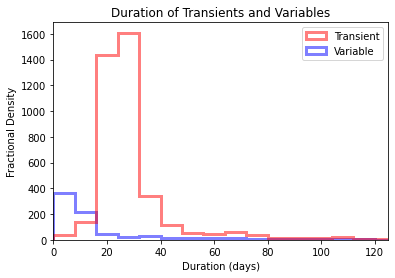

In [8]:
hist('duration', 8, [0,125], 'Duration of Transients and Variables', 'Duration (days)')

### Rise/Fade Scatter

Text(0, 0.5, 'Fade (Days)')

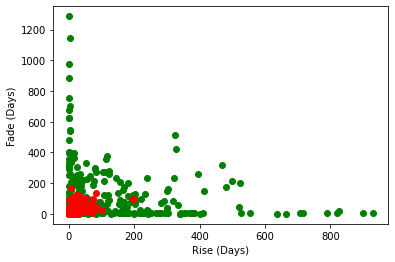

In [9]:
fig, ax1 = plt.subplots(nrows=1,ncols=1)
ax1.scatter(t['rise'],t['fade'], color='r', zorder=1)
ax1.scatter(v['rise'], v['fade'], color='g', zorder=0)
ax1.set_xlabel('Rise (Days)')
ax1.set_ylabel('Fade (Days)')

### Peak Magnitude/Fade Scatter

Text(0, 0.5, 'Fade (Days)')

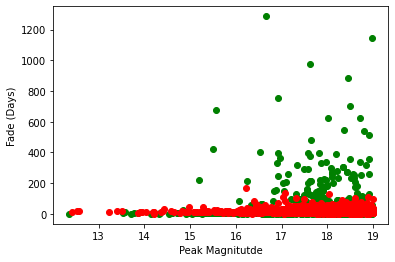

In [10]:
fig, ax1 = plt.subplots(nrows=1,ncols=1)
ax1.scatter(t['peakmag'],t['fade'], color='r', zorder=1)
ax1.scatter(v['peakmag'], v['fade'], color='g', zorder=0)
ax1.set_xlabel('Peak Magnitutde')
ax1.set_ylabel('Fade (Days)')

### Fade Histogram

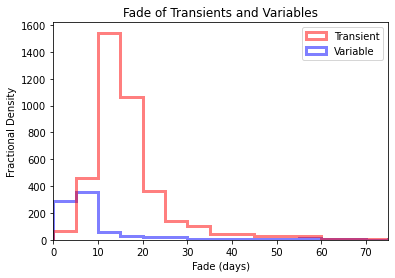

In [11]:
hist('fade', 5, [0,75], 'Fade of Transients and Variables', 'Fade (days)')

### Rise Histogram

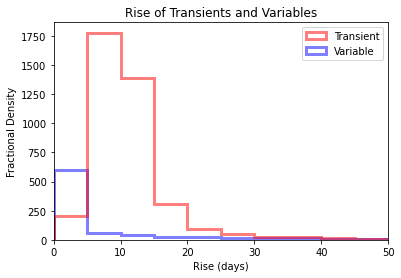

In [12]:
hist('rise', 5, [0,50], 'Rise of Transients and Variables', 'Rise (days)')

### Peak Magnitude Histogram

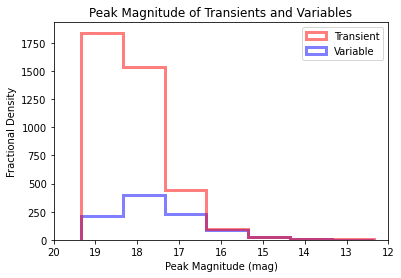

In [13]:
hist('peakmag', 1, [20,12], 'Peak Magnitude of Transients and Variables', 'Peak Magnitude (mag)')

### Peak Absolute Magnitude Histogram

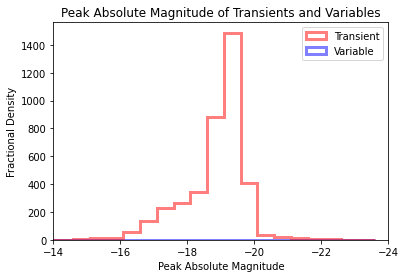

In [14]:
hist('peakabs', 0.5, [-14,-24], 'Peak Absolute Magnitude of Transients and Variables', 'Peak Absolute Magnitude')

### Redshift Histogram

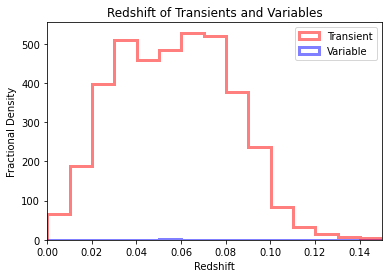

In [15]:
hist('redshift', 0.01, [0,0.15], 'Redshift of Transients and Variables', 'Redshift')

### b Histogram

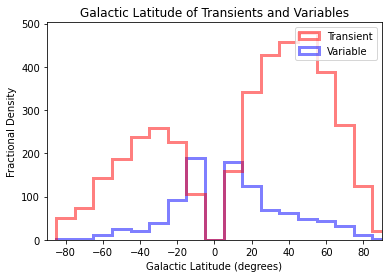

In [16]:
hist('b', 10, [-90,90], 'Galactic Latitude of Transients and Variables', 'Galactic Latitude (degrees)')

### A_V Histogram

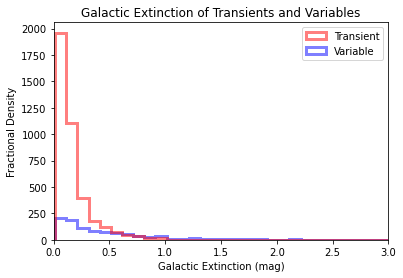

In [17]:
hist('A_V', 0.1, [0,3], 'Galactic Extinction of Transients and Variables', 'Galactic Extinction (mag)')

### Light curve

20.540346
18.114603


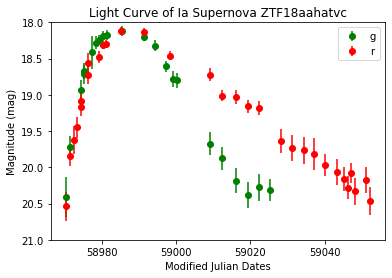

In [18]:
fig, ax1 = plt.subplots()
plt.ylim(21,18)
detections = pd.read_csv('transient-curve/detections.csv')
g_detections = detections[detections['fid'] == 1]
r_detections = detections[detections['fid'] == 2]
ax1.errorbar(g_detections['mjd'], g_detections['magpsf'], yerr=g_detections['sigmapsf'], color='g', fmt='o', label='g')
ax1.errorbar(r_detections['mjd'], r_detections['magpsf'], yerr=r_detections['sigmapsf'], color='r', fmt='o', label='r')
plt.legend()
plt.xlabel('Modified Julian Dates')
plt.ylabel('Magnitude (mag)')
plt.title('Light Curve of Ia Supernova ZTF18aahatvc')
plt.savefig('plots/transient-curve.pdf', bbox_inches='tight')
print(max(r_detections['magpsf']))
print(min(r_detections['magpsf']))

20.5471
18.119469


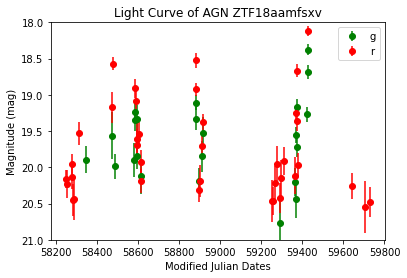

In [19]:
fig, ax1 = plt.subplots()
plt.ylim(21,18)
detections = pd.read_csv('variable-curve/detections.csv')
g_detections = detections[detections['fid'] == 1]
r_detections = detections[detections['fid'] == 2]
ax1.errorbar(g_detections['mjd'], g_detections['magpsf'], yerr=g_detections['sigmapsf'], color='g', fmt='o', label='g')
ax1.errorbar(r_detections['mjd'], r_detections['magpsf'], yerr=r_detections['sigmapsf'], color='r', fmt='o', label='r')
plt.legend()
plt.xlabel('Modified Julian Dates')
plt.ylabel('Magnitude (mag)')
plt.title('Light Curve of AGN ZTF18aamfsxv')
plt.savefig('plots/variable-curve.pdf', bbox_inches='tight')
print(max(r_detections['magpsf']))
print(min(r_detections['magpsf']))